# 泰坦尼克之灾

## 项目目的

通过对给定的真实事件中的数据进行分析，对所给出的人员相关信息数据进行预测，判断其是否在沉船事故中幸存

## 数据描述

数据在两个csv文件中，分别为
- training set (train.csv)
- test set (test.csv)


具体特征如下：

| **Variable** | **Definition**                             | **Key**                                        |
| ------------ | ------------------------------------------ | ---------------------------------------------- |
| survival     | Survival                                   | 0 = No, 1 = Yes                                |
| pclass       | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex          | Sex                                        |                                                |
| Age          | Age in years                               |                                                |
| sibsp        | # of siblings / spouses aboard the Titanic |                                                |
| parch        | # of parents / children aboard the Titanic |                                                |
| ticket       | Ticket number                              |                                                |
| fare         | Passenger fare                             |                                                |
| cabin        | Cabin number                               |                                                |
| embarked     | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [1]:
import numpy as np
import pandas as pd

file_path_train = './data/train.csv'
df_train = pd.read_csv(file_path_train)
df_train[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


![overview](./pic/overview.png)

## 项目任务

- 初步观察数据
- 数据预处理
- 训练模型进行预测
- 分析训练结果

### 初步观察数据

- Name, Ticket和Cabin不会对结果产生影响, 不加分析
- Pclass, Sex, SibSp, Parch, Embarked是离散特征, 直接分析
- Age, Fare是连续特征, 转化为离散特征后分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_train = './data/train.csv'
file_path_test = './data/test.csv'

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

# %matplotlib inline
sns.set(color_codes=True)#导入seaborn包设定颜色

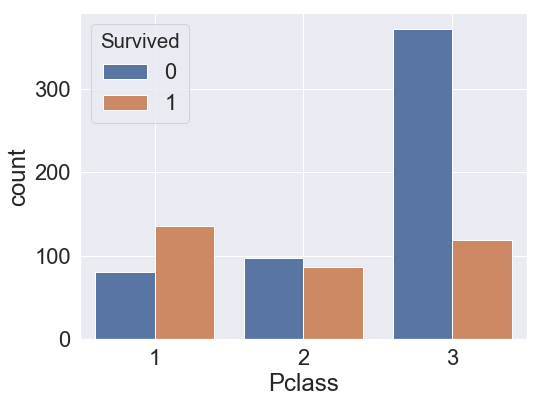

In [3]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('Pclass') 
plt.ylabel('count')
plt.grid(True)
plt.show()

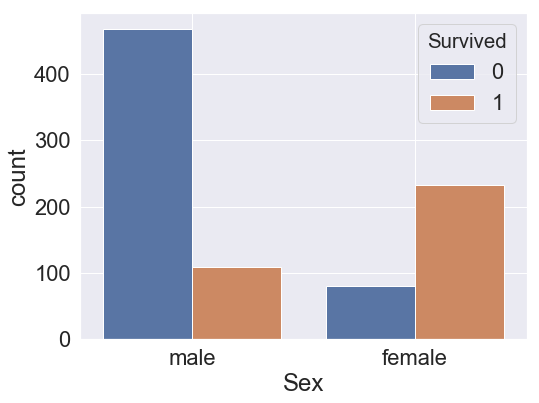

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('Sex') 
plt.ylabel('count')
sns.set(font_scale=2)
plt.grid(True)
plt.show()

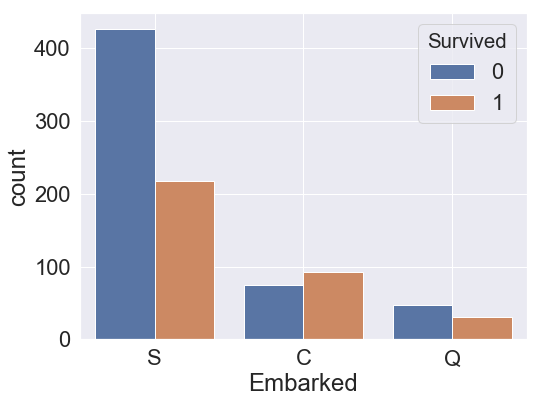

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('Embarked') 
plt.ylabel('count')
sns.set(font_scale=2)
plt.grid(True)
plt.show()

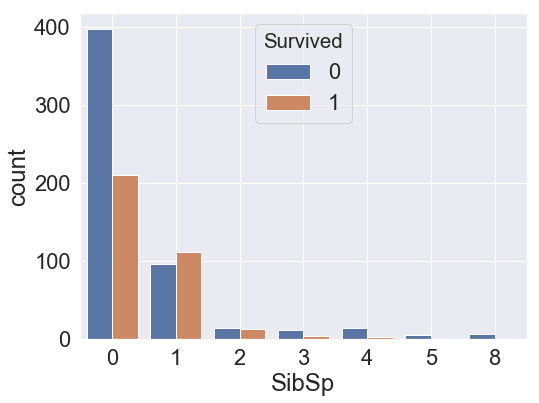

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'SibSp', hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('SibSp') 
plt.ylabel('count')
sns.set(font_scale=2)
plt.grid(True)
plt.show()

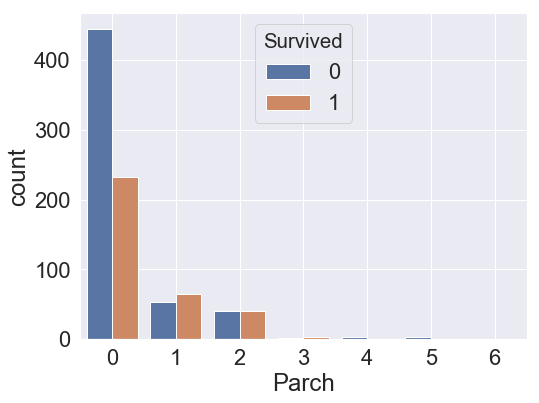

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = 'Parch', hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('Parch') 
plt.ylabel('count')
sns.set(font_scale=2)
plt.grid(True)
plt.show()

将连续数据Age和Fare转为离散，方便可视化和建模

In [8]:
ageNum = df_train['Age']
bins = [0,15,30,45,60,75]
ageArea = pd.cut(ageNum, bins)
df_train['ageClass'] = pd.cut(ageNum, [0,15,30,45,60,75,90],labels=[0,1,2,3,4,5])

fareNum = df_train['Fare']
bins = [0,20,40,60,80,160]
fareArea = pd.cut(fareNum, bins)
df_train['fareClass'] = pd.cut(fareNum, [0,15,30,45,60,75,90],labels=[0,1,2,3,4,5])

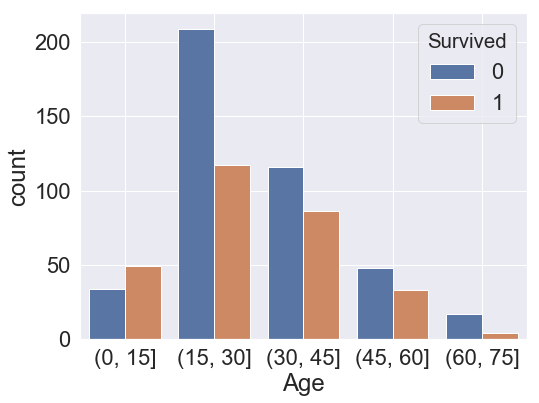

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = ageArea, hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('Age') 
plt.ylabel('count')
sns.set(font_scale=2)
plt.grid(True)
plt.show()

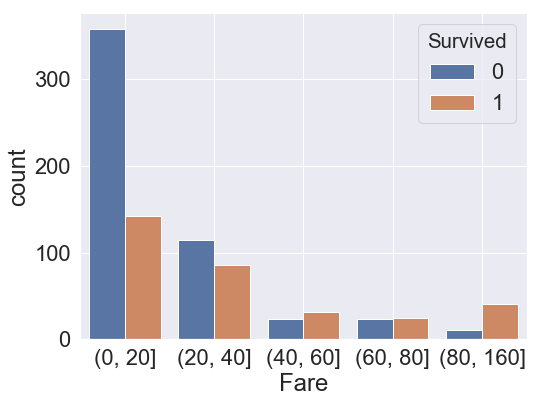

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x = fareArea, hue = 'Survived', data = df_train, ax=ax)
plt.xlabel('Fare') 
plt.ylabel('count')
sns.set(font_scale=2)
plt.grid(True)
plt.show()

可得以上的特征都对结果多少有一些影响，暂且先保留

### 数据预处理

将用非整形表示的分类特征转化为整形，方便建模

连续数据离散化在上一步已经完成，就不必再做

In [11]:
# Sex
df_train['Sex'] = df_train['Sex'].fillna('unknown')
df_train['Sex'] = df_train['Sex'].map( {'female': 0, 'male': 1, 'unknown':-1} ).astype(int)
# Embarked
df_train['Embarked'] = df_train['Embarked'].fillna('unknown') 
df_train['Embarked'] = df_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2, 'unknown': -1} ).astype(int)

删除不需要用到的特征列

In [12]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'Age', 'Fare']
df_train = df_train.drop(drop_elements, axis = 1)

查看特征之间的相关性

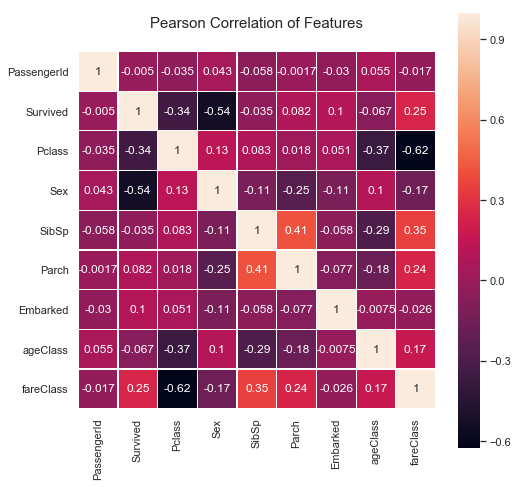

In [13]:
sns.set(font_scale=1)
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()

### 训练模型进行预测

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
df_train['ageClass'] = df_train['ageClass'].fillna(5)
df_train['fareClass'] = df_train['fareClass'].fillna(5)

cv = KFold(n_splits = 10)
accuracies = list()
max_attributes = len(df_train.columns.tolist()) - 1
depth_range = range(1, max_attributes + 1)
accuracies = []
for depth in depth_range:
    accuracy = []
    tree_clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    for train_fold, valid_fold in cv.split(df_train):
        df_train_tmp, df_valid_tmp = df_train.loc[train_fold], df_train.loc[valid_fold]
        tree_clf_tmp = tree_clf.fit(X = df_train_tmp.drop(['PassengerId', 'Survived'], axis=1), y = df_train_tmp["Survived"])
        valid_acc = tree_clf_tmp.score(X = df_valid_tmp.drop(['PassengerId', 'Survived'], axis=1), y = df_valid_tmp["Survived"])
        accuracy.append(valid_acc)
        
    acc = sum(accuracy)/len(accuracy)
    accuracies.append(acc)  

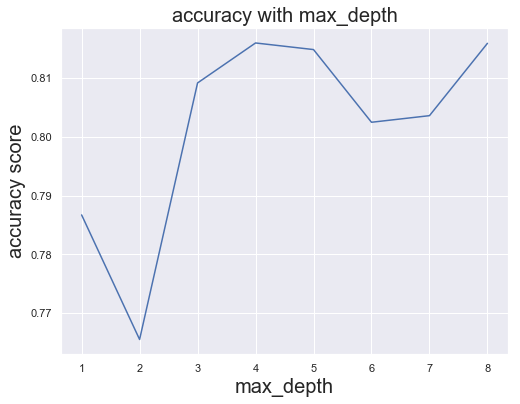

In [16]:
plt.subplots(figsize=(8,6))
plt.plot(depth_range, accuracies)
plt.title('accuracy with max_depth',fontsize=20)
plt.xlabel('max_depth',fontsize=20)
plt.ylabel('accuracy score',fontsize=20)
plt.grid(True)
plt.show()

In [17]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 4)
    
df_train_tmp, df_valid_tmp = df_train.loc[train_fold], df_train.loc[valid_fold]
tree_clf_tmp = tree_clf.fit(X = df_train_tmp.drop(['PassengerId', 'Survived'], axis=1), y = df_train_tmp["Survived"])
valid_acc = tree_clf_tmp.score(X = df_valid_tmp.drop(['PassengerId', 'Survived'], axis=1), y = df_valid_tmp["Survived"])

### 分析训练结果

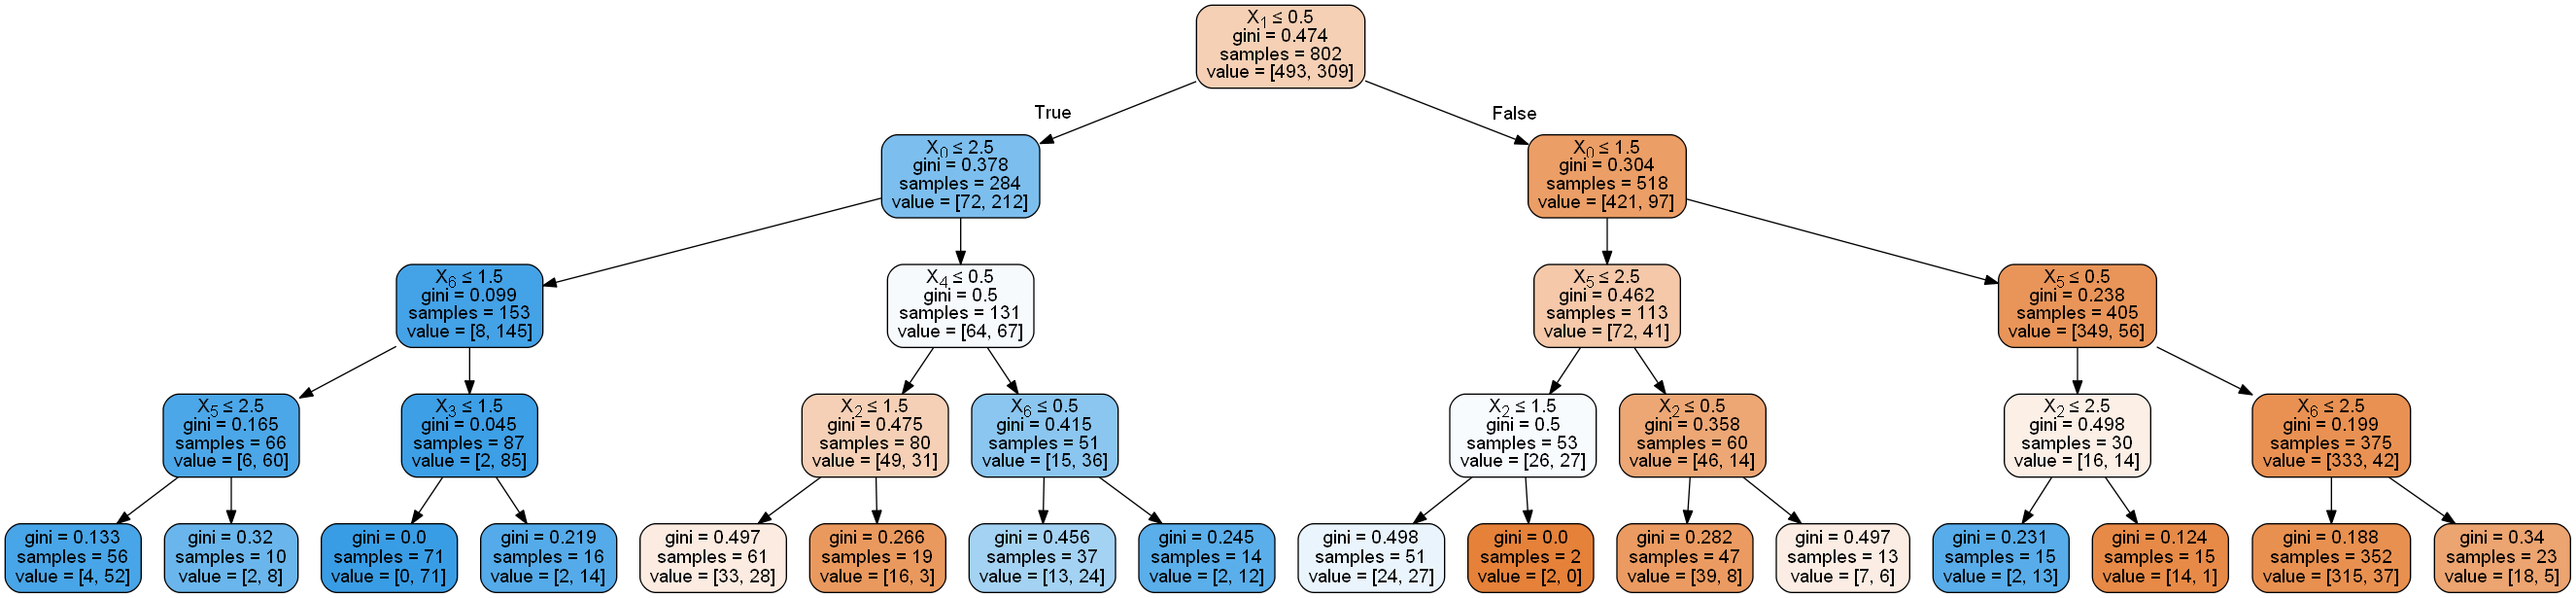

In [21]:
from IPython.display import Image 
import pydotplus 
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)   
Image(graph.create_png(), width=1000, height=500)